# Урок 8. Деревья решений.

В уроках мы разбирали на небольшом наборе данных деревья решений без настройки гиперпараметров. Здесь предлагаем вам рассмотреть работу классификатора на более сложном датасете, применив настройку гиперпараметров.

### 1.
На датасете из предыдущего урока - load_wine() - обучите дерево решений (DecisionTreeClassifier).

*Примечание: при установке гиперпараметров модели и разбиении на тренировочный и тестовый датасеты используйте random_state=17 для воспроизводимости результатов.*

In [21]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [22]:
### YOUR CODE HERE ###
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=17
)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### 2.
Отобразите дерево с помощью библиотеки graphviz.

*Примечание: если, изучая урок, вы не установили библиотеку graphviz, то необходимо сделать это сейчас.*

In [23]:
from sklearn import tree
import graphviz

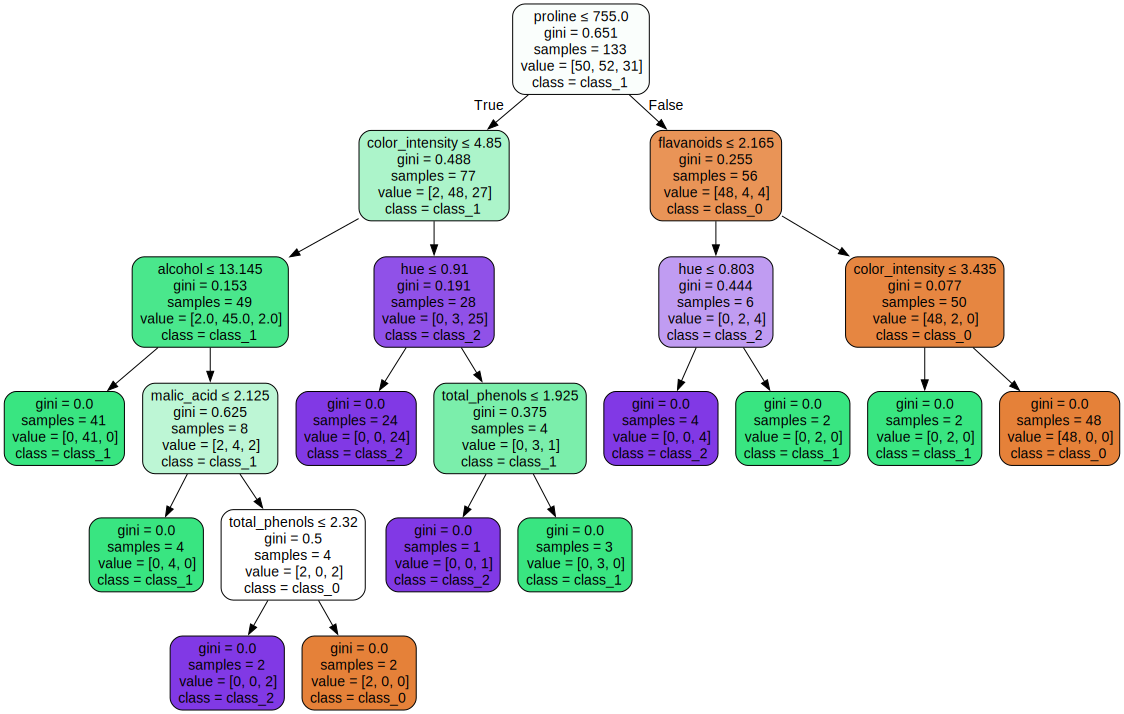

In [24]:
### YOUR CODE HERE ###
# Visualize the tree
def print_graph(data):
    dot_data = tree.export_graphviz(
        clf,
        out_file=None,
        feature_names=wine.feature_names,
        class_names=wine.target_names,
        filled=True,
        rounded=True,
        special_characters=True,
    )
    return graphviz.Source(dot_data)


print_graph(clf)

### 3.
Используя полученную модель, сделайте прогноз для тестовой выборки данных и, пользуясь встроенной функцией score(), определите точность модели.

In [25]:
### YOUR CODE HERE ###
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.9333333333333333


Теперь попробуем сделать начальную настройку гиперпараметров и посмотреть, что из этого выйдет.

### 4.

Постройте модель, указав гиперпараметр max_features равным 2 (так же указав random_state=17) и, сделав прогноз на тестовых данных, определите, стала ли модель работать точнее.

*Примечание: гиперпараметр max_features показывает модели, сколько различных признаков необходимо использовать каждый раз при принятии решения о разделении. То есть если, допустим, у вас имеются 50 признаков, а max_features=10, то в каждом узле случайным образом выбираются 10 признаков, которые будут использоваться для поиска лучшего разделения.*

In [26]:
### YOUR CODE HERE ###
from sklearn.metrics import accuracy_score


model = DecisionTreeClassifier(max_features=2, random_state=17)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9555555555555556


### 5.
Теперь постройте граф дерева решений, используя graphviz.

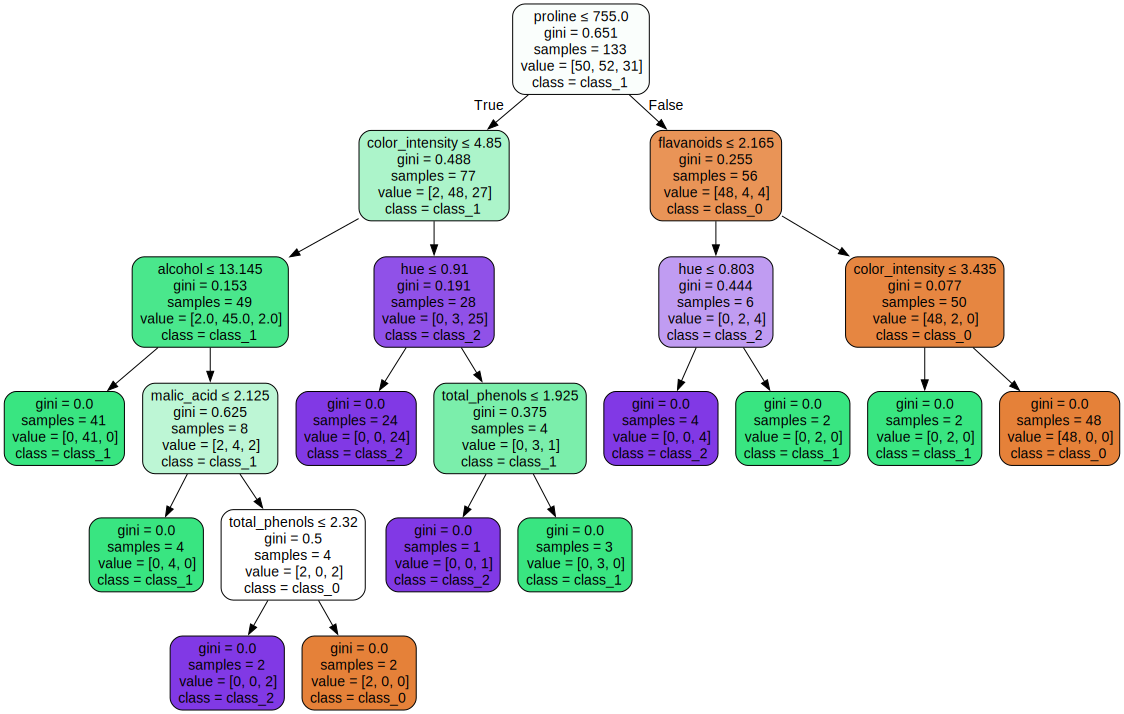

In [27]:
### YOUR CODE HERE ###
# Visualize the tree
print_graph(clf)

Модель работает точнее, чем без настройки гиперпараметров, но по графу можно увидеть, что глубина дерева увеличилась, при этом в нескольких листах присутствует только по одному объекту, из-за чего на тестовом наборе данных дерево могло несколько потерять обобщающую способность.

Так как главная задача модели - способность обобщаться на новые данные, то для подбора оптимальных гиперпараметров надо пожертвовать небольшой порцией данных, чтобы на ней во время обучения проверять качество модели.

Часто для этого используют кросс-валидацию: модель обучается K раз на (K-1) подвыборках исходной выборки, а на одной подвыборке проверяется (каждый раз на разной). Получаются K оценок качества модели, которые обычно усредняются, давая среднюю оценку.

Кросс-валидация применяется для подбора гиперпараметров модели в методе GridSearchCV(): для каждой уникальной совокупности значений параметров проводится кросс-валидация и выбирается лучшее сочетание параметров.

### 6.
Используя обученное в предыдущем задании дерево решений, настройте параметры max_depth и max_features на 5-кратной валидации с помощью GridSearchCV. Для этого в функцию GridSearchCV передайте параметры (tree, tree_params, cv=5).

*Примечание: tree здесь - не обученная модель, а объект, который инкапсулирует алгоритм. Например, в уроке мы его обозначали как dtc.*

In [28]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [30]:
tree_params = {'max_depth': range(1, 6),
               'max_features': range(1, 10)}

tree_grid = GridSearchCV(clf, tree_params, cv=5, n_jobs=-1, verbose=True)

### 7.
С помощью метода tree_grid.fit() постройте модель на тренировочных данных и выведите лучшее сочетание параметров с помощью метода tree_grid.best_params_.

In [31]:
### YOUR CODE HERE ###
# Fit the tree grid
tree_grid.fit(X_train, y_train)

# Print the best parameters
print(tree_grid.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'max_depth': 3, 'max_features': 7}


### 8.
С помощью полученной модели сделайте прогноз - predict - для тестовой выборки и выведите долю верных ответов, проверив точность модели, используя функцию accuracy_score.

In [33]:
from sklearn.metrics import accuracy_score


# Use best estimator to make predictions
best_tree = tree_grid.best_estimator_
tree_predictions = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, tree_predictions)
print(f"Using tree with parameters {tree_grid.best_params_} has accuracy: {accuracy}")

Using tree with parameters {'max_depth': 3, 'max_features': 7} gives accuracy: 0.9777777777777777
